In [70]:
# import pandas as pd
# file_path = './dataset/users.csv'
# df = pd.read_csv(file_path, nrows=10000)
# new_file_path = './dataset/users_DEMO.csv'
# df.to_csv(new_file_path, index=False)

In [71]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import missingno as msno

In [72]:
recommendations = pd.read_csv('./dataset/recommendations_DEMO.csv')
users = pd.read_csv('./dataset/users_DEMO.csv')
games = pd.read_csv('./dataset/games.csv')
games.head(50)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
5,250180,METAL SLUG 3,2015-09-14,True,False,False,Very Positive,90,5579,7.99,7.99,0.0,True
6,253980,Enclave,2013-10-04,True,True,True,Mostly Positive,75,1608,4.99,4.99,0.0,True
7,271850,Men of War: Assault Squad 2 - Deluxe Edition u...,2014-05-16,True,False,False,Mixed,61,199,6.99,6.99,0.0,True
8,282900,Hyperdimension Neptunia Re;Birth1,2015-01-29,True,False,False,Very Positive,94,9686,14.99,14.99,0.0,True
9,19810,The Sum of All Fears,2008-10-10,True,False,False,Mostly Positive,75,33,9.99,9.99,0.0,True


In [73]:
recommendations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          10000 non-null  int64  
 1   helpful         10000 non-null  int64  
 2   funny           10000 non-null  int64  
 3   date            10000 non-null  object 
 4   is_recommended  10000 non-null  bool   
 5   hours           10000 non-null  float64
 6   user_id         10000 non-null  int64  
 7   review_id       10000 non-null  int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 556.8+ KB


In [74]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   10000 non-null  int64
 1   products  10000 non-null  int64
 2   reviews   10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [75]:
recommendations.describe()

,app_id,helpful,funny,hours,user_id,review_id
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.00000
mean,6.233737e+05,3.119000,1.114100,199.301200,6.007807e+06,4999.50000
std,5.137966e+05,47.322861,34.777266,235.063727,3.831733e+06,2886.89568
min,4.400000e+02,0.000000,0.000000,0.000000,2.482000e+03,0.00000
25%,2.557100e+05,0.000000,0.000000,30.075000,2.774264e+06,2499.75000
50%,3.943600e+05,0.000000,0.000000,97.350000,5.541098e+06,4999.50000
75%,1.091500e+06,0.000000,0.000000,286.725000,9.007588e+06,7499.25000
max,2.208920e+06,3749.000000,3055.000000,999.900000,1.378082e+07,9999.00000


In [76]:
users.describe()

,user_id,products,reviews
count,1.000000e+04,10000.000000,10000.000000
mean,9.599218e+06,287.912400,3.687800
std,2.632168e+06,426.043582,10.067386
min,8.430000e+02,0.000000,0.000000
25%,8.369042e+06,84.000000,1.000000
50%,1.084780e+07,175.000000,1.000000
75%,1.134348e+07,335.000000,3.000000
max,1.378592e+07,10113.000000,553.000000


In [77]:
recommendations_null = recommendations.isnull().sum()
users_null = users.isnull().sum()
print(recommendations_null)
print(users_null)

app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64
user_id     0
products    0
reviews     0
dtype: int64


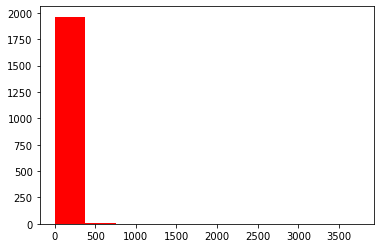

In [78]:
helpful = recommendations[recommendations['helpful']>0]
plt.hist(helpful['helpful'], 
orientation = 'vertical',
histtype = 'bar', color ='red')
plt.show()

In [79]:
recommendations['is_recommended'].replace(True,1,inplace=True)
recommendations['is_recommended'].replace(False,0,inplace=True)
recommendations.head(5)

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,1,36.3,49625,0
1,304390,4,0,2017-02-17,0,11.5,2482,1
2,1085660,2,0,2019-11-17,1,336.5,243409,2
3,703080,0,0,2022-09-23,1,27.4,248701,3
4,526870,0,0,2021-01-10,1,7.9,22902,4


In [82]:
rec_numeric_index = ['helpful',	'funny', 'hours', 'is_recommended']
recommendations_numeric = recommendations[rec_numeric_index]
recommendations_numeric['is_recommended'] = recommendations_numeric['is_recommended'].astype(int)
recommendations_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   helpful         10000 non-null  int64  
 1   funny           10000 non-null  int64  
 2   hours           10000 non-null  float64
 3   is_recommended  10000 non-null  int32  
dtypes: float64(1), int32(1), int64(2)
memory usage: 273.6 KB


<AxesSubplot:>

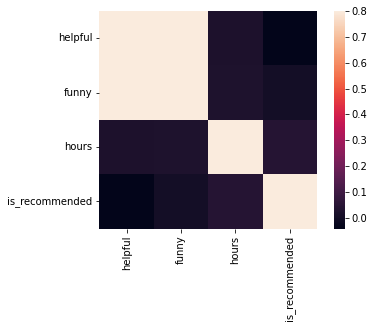

In [83]:
correlation = recommendations_numeric.corr()
sns.heatmap(correlation,square = True,  vmax=0.8)